# Importando os Dados

In [1]:
!pip install -U imbalanced-learn

In [2]:
import pandas as pd

In [3]:
dados = pd.read_csv('dados/Customer-Churn.csv')

In [4]:
dados.shape

(7043, 18)

In [5]:
dados.head()

,Maior65Anos,Conjuge,Dependentes,MesesDeContrato,TelefoneFixo,VariasLinhasTelefonicas,ServicoDeInternet,SegurancaOnline,BackupOnline,SeguroNoDispositivo,SuporteTecnico,TVaCabo,StreamingDeFilmes,TipoDeContrato,PagamentoOnline,FormaDePagamento,ContaMensal,Churn
0,0,Sim,Nao,1,Nao,SemServicoTelefonico,DSL,Nao,Sim,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequeDigital,29.85,Nao
1,0,Nao,Nao,34,Sim,Nao,DSL,Sim,Nao,Sim,Nao,Nao,Nao,UmAno,Nao,ChequePapel,56.95,Nao
2,0,Nao,Nao,2,Sim,Nao,DSL,Sim,Sim,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequePapel,53.85,Sim
3,0,Nao,Nao,45,Nao,SemServicoTelefonico,DSL,Sim,Nao,Sim,Sim,Nao,Nao,UmAno,Nao,DebitoEmConta,42.30,Nao
4,0,Nao,Nao,2,Sim,Nao,FibraOptica,Nao,Nao,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequeDigital,70.70,Sim


## Diferentes Variáveis

In [6]:
#modificação de forma manual
traducao_dic = {
    'Sim' : 1,
    'Nao' : 0
}

dadosmodificados = dados [['Conjuge', 'Dependentes', 'TelefoneFixo',
                          'PagamentoOnline', 'Churn']].replace(traducao_dic)
dadosmodificados.head()

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Churn
0,1,0,0,1,0
1,0,0,1,0,0
2,0,0,1,1,1
3,0,0,0,0,0
4,0,0,1,1,1


In [7]:
#transformação pelo get_dummies
dummie_dados = pd.get_dummies(dados.drop(['Conjuge', 'Dependentes', 'TelefoneFixo',
                          'PagamentoOnline', 'Churn'], axis=1))

#junção dos dados transformados com os que já tinhamos
dados_final = pd.concat([dadosmodificados, dummie_dados], axis=1)

In [8]:
dados_final.head()

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Churn,Maior65Anos,MesesDeContrato,ContaMensal,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,...,StreamingDeFilmes_Nao,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta
0,1,0,0,1,0,0,1,29.85,0,1,...,1,0,0,0,1,0,0,1,0,0
1,0,0,1,0,0,0,34,56.95,1,0,...,1,0,0,0,0,1,0,0,1,0
2,0,0,1,1,1,0,2,53.85,1,0,...,1,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,0,45,42.30,0,1,...,1,0,0,0,0,1,0,0,0,1
4,0,0,1,1,1,0,2,70.70,1,0,...,1,0,0,0,1,0,0,1,0,0


In [9]:
dados_final.shape

(7043, 39)

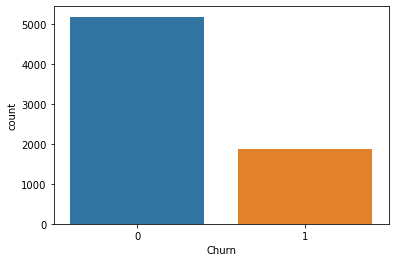

In [10]:
import seaborn as sns
%matplotlib inline

ax = sns.countplot(x='Churn', data=dados_final)

In [11]:
!pip install -U imbalanced-learn

In [12]:
# Para podermos aplicar o SMOTE, devemos separar  os dados em variáveis características e resposta  

X = dados_final.drop('Churn', axis = 1)
y = dados_final['Churn']

In [13]:
from imblearn.over_sampling import SMOTE

smt = SMOTE(random_state=123)  # Instancia um objeto da classe SMOTE
X, y = smt.fit_resample(X, y)  # Realiza a reamostragem do conjunto de dados

In [14]:
dados_final = pd.concat([X, y], axis=1)  # Concatena a variável target (y) com as features (X)

# Verifica se o balanceamento e a concatenação estão corretos.
dados_final.head(2)

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Maior65Anos,MesesDeContrato,ContaMensal,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,VariasLinhasTelefonicas_Sim,...,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta,Churn
0,1,0,0,1,0,1,29.85,0,1,0,...,0,0,0,1,0,0,1,0,0,0
1,0,0,1,0,0,34,56.95,1,0,0,...,0,0,0,0,1,0,0,1,0,0


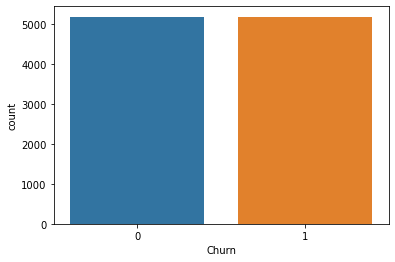

In [15]:
ax = sns.countplot(x='Churn', data=dados_final)  # plotando a variável target balanceada.

## 𝑦𝑖  =  𝑓(𝑥𝑖)

In [16]:
Xmaria = [[0,0,1,1,0,0,39.90,1,0,0,0,1,0,1,0,0,0,0,1,1,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1]]

In [17]:
Xmaria

[[0,
  0,
  1,
  1,
  0,
  0,
  39.9,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1]]

In [18]:
X = dados_final.drop('Churn', axis = 1)
y = dados_final['Churn']

In [19]:
#Biblioteca para padronizar os dados

from sklearn.preprocessing import StandardScaler

In [20]:
# atribuindo a funcao e calculando o desvio padrao de dados dos clientes

norm = StandardScaler()

X_normalizado = norm.fit_transform(X)
X_normalizado

array([[ 1.26542767, -0.52756038, -3.06083934, ...,  1.30292044,
        -0.47882211, -0.4360152 ],
       [-0.79024667, -0.52756038,  0.32670777, ..., -0.76750657,
         2.08845829, -0.4360152 ],
       [-0.79024667, -0.52756038,  0.32670777, ..., -0.76750657,
         2.08845829, -0.4360152 ],
       ...,
       [-0.79024667, -0.52756038,  0.32670777, ...,  1.30292044,
        -0.47882211, -0.4360152 ],
       [-0.79024667, -0.52756038,  0.32670777, ..., -0.76750657,
        -0.47882211, -0.4360152 ],
       [-0.79024667, -0.52756038,  0.32670777, ..., -0.76750657,
        -0.47882211, -0.4360152 ]])

In [21]:
# transformando os dados da Maria em um Array
Xmaria_normalizado = norm.transform(pd.DataFrame(Xmaria, columns = X.columns))
Xmaria_normalizado

array([[-0.79024667, -0.52756038,  0.32670777,  0.81465673, -0.41350409,
        -1.14937735, -0.97235319,  1.1299503 , -0.31386908, -0.83366906,
        -0.66107688,  0.95797538, -0.44617598,  0.868102  , -0.44617598,
        -0.51766965, -0.95816089, -0.44617598,  1.57389661,  1.04285807,
         2.24126814, -0.64211419, -1.13662476,  2.24126814, -0.52426638,
         1.18667256, -0.44617598, -0.77707385, -0.83100748, -0.44617598,
         1.26620316, -0.44648735, -1.35522058,  2.38155929, -0.42576817,
        -0.76750657, -0.47882211,  2.293498  ]])

In [22]:
import numpy as np

In [23]:
#precisamos realizar o calcula da diferença do desvio padrao da maria em relação a algum cliente e elevar ao quadradonp.
a = Xmaria_normalizado

In [24]:
b = X_normalizado[0]

In [25]:
a - b

array([[-2.05567434,  0.        ,  3.38754711,  0.        ,  0.        ,
        -0.04166436,  0.34940684,  2.01494498, -3.49991084,  0.        ,
        -2.17376025,  2.00184354,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         2.68744412,  0.        , -2.01642259,  2.68744412,  0.        ,
         0.        ,  0.        ,  0.        , -2.03436608,  0.        ,
         2.05596584,  0.        , -2.09310784,  2.80145225,  0.        ,
        -2.07042701,  0.        ,  2.72951321]])

In [26]:
#exponenciação
np.square(a-b)

array([[4.22579699e+00, 0.00000000e+00, 1.14754754e+01, 0.00000000e+00,
        0.00000000e+00, 1.73591848e-03, 1.22085140e-01, 4.06000326e+00,
        1.22493759e+01, 0.00000000e+00, 4.72523363e+00, 4.00737757e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        7.22235589e+00, 0.00000000e+00, 4.06596007e+00, 7.22235589e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        4.13864535e+00, 0.00000000e+00, 4.22699553e+00, 0.00000000e+00,
        4.38110042e+00, 7.84813473e+00, 0.00000000e+00, 4.28666801e+00,
        0.00000000e+00, 7.45024235e+00]])

In [27]:
#somatório de todos os resultados
np.sum(np.square(a-b))

91.7095420529064

In [28]:
#tiramos a raiz e temos a distancia K de maria para o cliente 0
np.sqrt(91.7095420529064)

9.576509909821343

# Implementando o modelo

In [29]:
#bibliteca para divisão dos dados em treino e teste
from sklearn.model_selection import train_test_split

In [30]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X_normalizado, y, test_size=0.3, 
                                                       random_state=123)

## Treino e teste

In [31]:
#biblioteca para criarmos o modelo de machine learning
from sklearn.neighbors import KNeighborsClassifier

In [32]:
#instanciar o modelo - por padrão são 5 vizinhos
Knn = KNeighborsClassifier (metric="euclidean")

In [33]:
#treinando o modelo com os dados de treino
Knn.fit(X_treino, y_treino)

KNeighborsClassifier(metric='euclidean')

In [34]:
#treinando o modelo com os dados de teste
predito_Knn = Knn.predict(X_teste)

In [35]:
predito_Knn

array([1, 0, 0, ..., 0, 1, 1], dtype=int64)

In [36]:
#mediana dos dados ordenado de x de treino
np.median(X_treino)

-0.4461759755508453

In [37]:
#biblioteca para criar o modelo de machine learning
from sklearn.naive_bayes import BernoulliNB

In [38]:
#criando o modelo
bnb = BernoulliNB(binarize=-0.4461759755508453)

In [39]:
bnb.fit(X_treino,y_treino)

BernoulliNB(binarize=-0.4461759755508453)

In [40]:
predito_Bnb = bnb.predict(X_teste)

In [41]:
predito_Bnb

array([1, 0, 0, ..., 1, 1, 1], dtype=int64)

## 4.3 Implementando o modelo.

In [46]:
#Biblioteca para criarmos o modelo de machine learning
from sklearn.tree import DecisionTreeClassifier

In [47]:
#Instanciando o modelo
dtc = DecisionTreeClassifier(criterion='entropy', random_state=42)

In [49]:
#Treinando o modelo
dtc.fit(X_treino, y_treino)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [50]:
#verificar a importância de cada atributo
dtc.feature_importances_

array([0.02070208, 0.01349543, 0.0068095 , 0.02090223, 0.01492519,
       0.16169616, 0.22580293, 0.00889189, 0.00344576, 0.01122927,
       0.0019815 , 0.03128648, 0.00065123, 0.01251806, 0.        ,
       0.0145619 , 0.00784856, 0.        , 0.0097366 , 0.01125643,
       0.        , 0.00735279, 0.0143391 , 0.00396098, 0.01956256,
       0.00262135, 0.        , 0.00203258, 0.0082409 , 0.0003825 ,
       0.01088157, 0.03622159, 0.16358635, 0.07445054, 0.01664409,
       0.02129506, 0.02179021, 0.01889663])

In [54]:
predito_ArvoreDecisao = dtc.predict(X_teste)

In [53]:
predito_ArvoreDecisao

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

# Validação dos modelos

## Matriz de confusão

In [55]:
from sklearn.metrics import confusion_matrix

In [56]:
print(confusion_matrix(y_teste, predito_Knn))

[[1241  328]
 [ 251 1285]]


In [58]:
print(confusion_matrix(y_teste, predito_Bnb))

[[1048  521]
 [ 240 1296]]


In [59]:
print(confusion_matrix(y_teste, predito_ArvoreDecisao))

[[1250  319]
 [ 279 1257]]


# Acurácia

In [60]:
from sklearn.metrics import accuracy_score

In [64]:
print(accuracy_score(y_teste, predito_Knn))

0.8135265700483092


In [65]:
print(accuracy_score(y_teste, predito_Bnb))

0.7549114331723027


In [66]:
print(accuracy_score(y_teste, predito_ArvoreDecisao))

0.8074074074074075


# Precisão

In [70]:
from sklearn.metrics import precision_score

In [71]:
print(precision_score(y_teste, predito_Knn))

0.796652200867948


In [72]:
print(precision_score(y_teste, predito_Bnb))

0.71326362135388


In [74]:
print(precision_score(y_teste, predito_ArvoreDecisao))

0.7975888324873096


# Recall

In [75]:
#Recall calcula o quão bom o modelo está para classificar corretamente um resultado positivo

In [81]:
from sklearn.metrics import recall_score

In [82]:
print(recall_score(y_teste, predito_Knn))

0.8365885416666666


In [83]:
print(recall_score(y_teste, predito_Bnb))

0.84375


In [84]:
print(recall_score(y_teste, predito_ArvoreDecisao))

0.818359375


# Escolhendo o melhor modelo

In [86]:
# Análise das precisões calculadas anteriomente
print('Modelo KNN: ', precision_score(y_teste, predito_Knn))
print('Modelo Bernoulli de Naive Bayes: ', precision_score(y_teste, predito_Bnb))
print('Modelo Árvore de Decisão: ', precision_score(y_teste, predito_ArvoreDecisao))

Modelo KNN:  0.796652200867948
Modelo Bernoulli de Naive Bayes:  0.71326362135388
Modelo Árvore de Decisão:  0.7975888324873096
